In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.spatial import distance

In [9]:
# calculating euclidean distance between vectors
from math import sqrt
from sklearn.model_selection import KFold
kf=StratifiedKFold(n_splits=3)
# calculate euclidean distance
def euclidean_distance(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

data_set= pd.read_csv('C:/Users/user/Downloads/heart_disease_dataset.csv')
X= data_set.iloc[:, :-1].values  
Y= data_set.iloc[:, 13].values

In [10]:
from sklearn.model_selection import cross_val_score
from scipy.stats import mode

def KNN(X_train, X_test, Y_train, Y_test, k_val):
    y_hat=[]
    Xt_mean=X_train.mean()
    Xt_std=X_train.std()
#   X_noise_train=X_train+np.random.normal(Xt_mean,Xt_std,X_train.shape)
    noise=np.random.normal(Xt_mean,Xt_std,X_train.shape) #gaussian noise for X_train
    for test_pt in X_test:
        distances = list()
        for i in range(len(X_train)):
            distances.append([(euclidean_distance(X_train[i],test_pt)+noise[i,0]),i]) #adding noise to calculated euclidean distance
        distances.sort(key=lambda tup: tup[0])
        #print(distances)
        neighbors = list()
        for i in range(k_val):
            neighbors.append(Y_train[distances[i][1]])
        distances.sort(key=lambda tup: tup[0])
        #print(neighbors)
        voting=mode(neighbors).mode[0]
        #print(voting)#max(set(neighbors), key = neighbors.count)
        #print("****")
        y_hat.append(voting)
#   print(y_hat)
    return y_hat
# x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.20)
# KNN(x_train,x_test,y_train,y_test,3)

In [11]:
import statistics as stat
accuracy_vals=[]
k_value = list(range(1, 50, 2))
for i in k_value:
    per_fold_acc=[]
    for train_index,test_index in kf.split(X,Y):
        X_train=X[train_index]
        X_test=X[test_index]
        Y_train=Y[train_index]
        Y_test=Y[test_index]
        #print(KNN(X_train, X_test, Y_train, Y_test,k_val=5))
        #print(Y_test)
        #per_fold_acc=[]
        per_fold_acc.append(accuracy_score(Y_test,KNN(X_train, X_test, Y_train, Y_test,k_val=i)))
    accuracy_vals.append(stat.mean(per_fold_acc))
#accuracy_vals.append(accuracy_score(Y_test,KNN(X_train, X_test, Y_train, Y_test,k_val=i)))
print(accuracy_vals)

[0.504950495049505, 0.5214521452145214, 0.5412541254125413, 0.5115511551155116, 0.41254125412541254, 0.5115511551155116, 0.4752475247524753, 0.4851485148514852, 0.5412541254125413, 0.44554455445544555, 0.5412541254125413, 0.5412541254125413, 0.5115511551155116, 0.5412541254125413, 0.5412541254125413, 0.4884488448844885, 0.5412541254125413, 0.5412541254125413, 0.5412541254125413, 0.5115511551155116, 0.5016501650165017, 0.5412541254125413, 0.5115511551155116, 0.537953795379538, 0.48184818481848185]


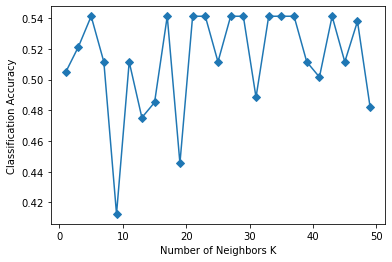

In [12]:
plt.plot(k_value, accuracy_vals,marker="D")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Classification Accuracy")
plt.show()